In [1]:
from code.neuron import *
from code.encodingsource import *
from code.hsgs import *
from code.classical_neuron import *
from code.classical_pso import *
from code.sf import *
simulator = Aer.get_backend('qasm_simulator')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from code.experiment_functions import * 

# Without Bias

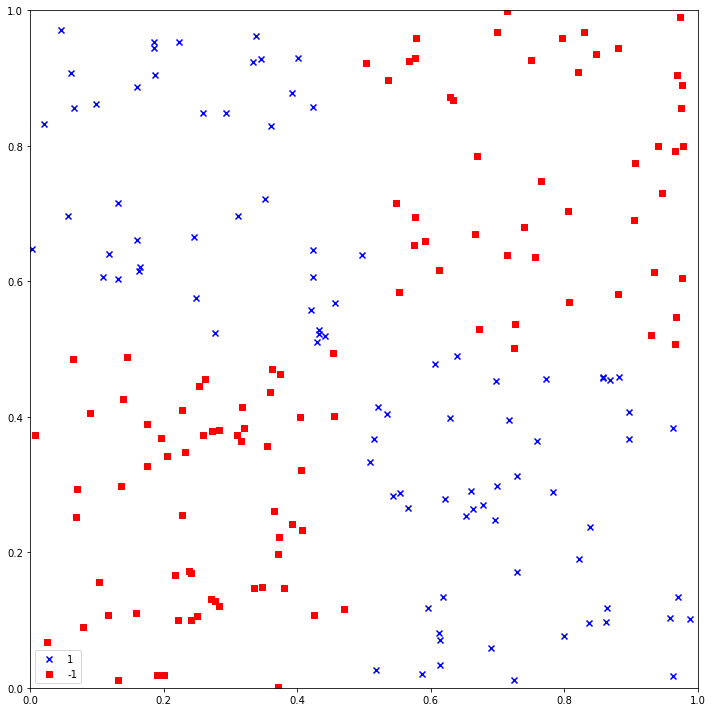

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Create Dataset
np.random.seed(0)
X_xor = np.random.rand(200, 4)
y_xor = np.logical_xor(X_xor[:, 0] > 0.5,
                       X_xor[:, 1] > 0.5)
y_xor = np.where(y_xor, 1, -1)

fig = plt.figure(figsize=(10,10))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_xor = np.round(X_xor, 2)
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.33, random_state=42)

In [ ]:
X_train = [list(x) for x in X_train]
X_test = [list(x) for x in X_test]
y_train = [int(1) if x == 1 else int(0) for x in y_train]
y_test = [int(1) if x == 1 else int(0) for x in y_test]

In [ ]:
X_train[0]

In [ ]:
with open('results/version6/train_xor.json', 'w+') as fp:
    json.dump([X_train, y_train], fp)
    
with open('results/version6/test_xor.json', 'w+') as fp:
    json.dump([X_test, y_test], fp)

#### load saved data

In [ ]:
with open('results/version6/train_xor.json') as json_file:
    X_train = json.load(json_file)[0]

with open('results/version6/train_xor.json') as json_file:
    y_train = json.load(json_file)[1]

In [ ]:
with open('results/version6/test_xor.json') as json_file:
    X_test = json.load(json_file)[0]

with open('results/version6/test_xor.json') as json_file:
    y_test = json.load(json_file)[1]

### Without Bias

In [ ]:
epoch_errosHSGS, epoch_errosEncodingWeight, epoch_errosEncodingInput, epoch_errosPhaseEncoding  = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=40, 
                                                                                                 trainingBias=False,
                                                                                                 error_by_epoch = True,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})

In [ ]:
with open('results/version6/error_by_epoch_unbiased.json', 'w+') as fp:
    json.dump({'epoch_errosHSGS': epoch_errosHSGS,
               'epoch_errosEncodingWeight': epoch_errosEncodingWeight, 
               'epoch_errosPhaseEncoding': epoch_errosPhaseEncoding, 
               'epoch_errosEncodingInput': epoch_errosEncodingInput},
              fp)

In [ ]:
weightsEncodingWeight, weightsEncodingInput, weightsPhaseEncoding, weightsHSGS = experiment_TRAIN(X_train, 
                                                                                                y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=20, 
                                                                                                 trainingBias=False,
                                                                                                 error_by_epoch = False,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})

In [ ]:
weights = [weightsEncodingWeight, 
          weightsEncodingInput, 
          weightsPhaseEncoding, 
          weightsHSGS]

In [ ]:
with open('results/version6/weights_unbiased_v6.json', 'w+') as fp:
    json.dump(weights, fp)

#### Test

In [ ]:
with open('results/version6/weights_unbiased_v6.json') as json_file:
    weights = json.load(json_file)

In [ ]:
resultsBIAS = experiment_TEST(X_test, 
                              y_test, 
                              weights[0], 
                              weights[1], 
                              weights[2], 
                              weights[3], 
                              repeat=10,
                              bias=False, 
                              testingApproaches={'neuronio-classico', 'neuronio-classico-bin', 'hsgs','encoding-weight', 'phase-encoding','encoding-input'})

In [ ]:
with open('results/version6/experiments_unbiased.json', 'w+') as fp:
    json.dump(resultsBIAS, fp)

## BIAS

In [ ]:
epoch_errosHSGS, epoch_errosEncodingWeight, epoch_errosEncodingInput, epoch_errosPhaseEncoding  = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=40, 
                                                                                                 trainingBias=True,
                                                                                                 error_by_epoch = True,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})
                                    

In [ ]:
with open('results/version6/error_by_epoch_biased.json', 'w+') as fp:
    json.dump({'epoch_errosHSGS': epoch_errosHSGS,
               'epoch_errosEncodingWeight': epoch_errosEncodingWeight, 
               'epoch_errosPhaseEncoding': epoch_errosPhaseEncoding, 
               'epoch_errosEncodingInput': epoch_errosEncodingInput},
              fp)

In [ ]:
weightsEncodingWeight, weightsEncodingInput, weightsPhaseEncoding, weightsHSGS = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=20, 
                                                                                                 trainingBias=True,
                                                                                                 error_by_epoch = False,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})

In [ ]:
weights = [weightsEncodingWeight, 
          weightsEncodingInput, 
          weightsPhaseEncoding, 
          weightsHSGS]

In [ ]:
with open('results/version6/weights_biased_v6.json', 'w+') as fp:
    json.dump(weights, fp)

In [ ]:
resultsBIAS = experiment_TEST(X_test, 
                              y_test, 
                              weights[0], 
                              weights[1], 
                              weights[2], 
                              weights[3], 
                              repeat=10,
                              bias=True, 
                              testingApproaches={'neuronio-classico', 'neuronio-classico-bin', 'hsgs','encoding-weight', 'phase-encoding','encoding-input'})

In [ ]:
with open('results/version6/experiments_biased.json', 'w+') as fp:
    json.dump(resultsBIAS, fp)

#### xgboost baseline

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(np.array(X_train), np.array(y_train))

In [ ]:
# make predictions for test data
y_pred = model.predict(np.array(X_test))
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(np.array(y_test), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))